<a href="https://colab.research.google.com/github/sabaakram539/model_pred_titanic/blob/main/Titanic_Predictive_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [11]:
titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
titanic.shape

(418, 11)

## Preprocessing

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
titanic=titanic.drop(columns='Cabin',axis=1)

In [15]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [16]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [17]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [19]:
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [24]:
titanic.Age.astype(int)

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int64

In [25]:
titanic.Age=titanic.Age.astype(int)

In [26]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S


In [27]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [28]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,0


## Visualizing the data

In [30]:
titanic.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


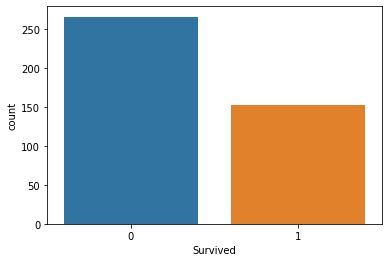

In [29]:
sns.countplot('Survived',data=titanic)

In [32]:
titanic.Sex.value_counts()

0    266
1    152
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


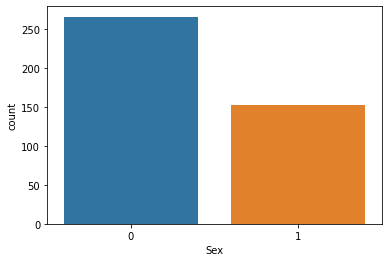

In [34]:
sns.countplot('Sex',data=titanic)

In [52]:
titanic.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


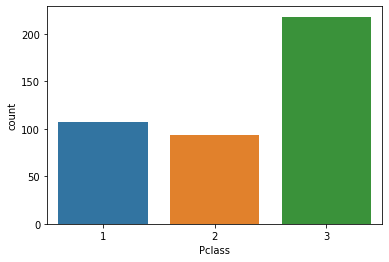

In [35]:
sns.countplot('Pclass',data=titanic)

In [53]:
titanic.Embarked.value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


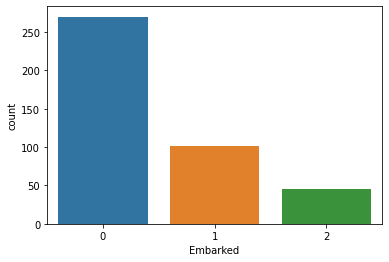

In [54]:
sns.countplot('Embarked',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


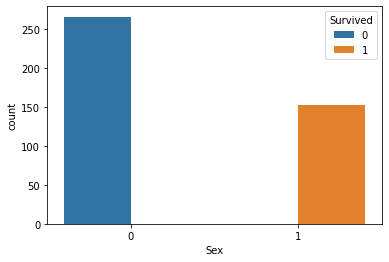

In [45]:
sns.countplot('Sex',hue='Survived',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


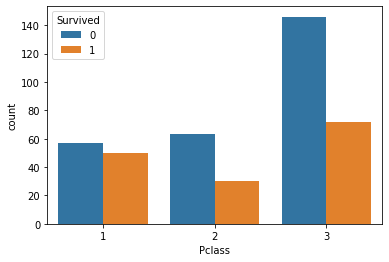

In [44]:
sns.countplot('Pclass',hue="Survived",data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


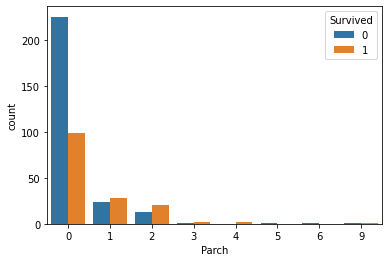

In [49]:
sns.countplot('Parch',hue="Survived",data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


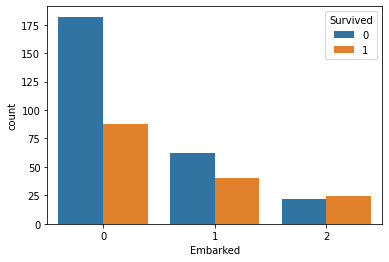

In [50]:
sns.countplot('Embarked',hue="Survived",data=titanic)

## Separating features and the target variable

In [56]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,0


In [62]:
titanic_features=titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
titanic_target=titanic['Survived']

In [63]:
titanic_features.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7.8292,2
1,3,1,47,1,0,7.0000,0


In [60]:
titanic_target.head(2)

0    0
1    1
Name: Survived, dtype: int64

## Splitting into the training and test dataset.

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(titanic_features,titanic_target,test_size=0.2,random_state=2)

In [66]:
x_train.shape

(334, 7)

In [67]:
x_test.shape

(84, 7)

In [68]:
y_train.shape

(334,)

In [69]:
y_test.shape

(84,)

## Applying Logistics Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model=LogisticRegression()

In [73]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
model.score(x_test,y_test)

1.0

In [74]:
y_pred=model.predict(x_test)

## Checking Accuracy

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
test_data_accuracy=accuracy_score(y_pred,y_test)

In [77]:
test_data_accuracy

1.0

In [78]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,0


In [79]:
model.predict([[3,0,34,0,0,7.8292,2]])

array([0])